#### Analysing heart disease data from Kaggle

In [70]:
import pyforest

#### Load dataset from url

In [73]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
df = pd.read_csv(url, index_col='PassengerId')
df.head()

<IPython.core.display.Javascript object>

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df.shape

(891, 11)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Get subset data

In [77]:
age_sex = df[["Age", "Sex"]]
age_sex.head()

,Age,Sex
PassengerId,,
1,22.0,male
2,38.0,female
3,26.0,female
4,35.0,female
5,35.0,male


#### FIltering

In [78]:
above_35 =  df[df['Age']>35]
above_35.shape

(217, 11)

In [79]:
class_23 = df[df['Pclass'].isin([2, 3])]
class_23.shape

(675, 11)

In [80]:
age_no_na = df[df['Age'].notna()]
age_no_na.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Select specific rows and columns

In [81]:
adult_names = df.loc[df['Age'] > 35, "Name"]
adult_names.head()

PassengerId
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
7                               McCarthy, Mr. Timothy J
12                             Bonnell, Miss. Elizabeth
14                          Andersson, Mr. Anders Johan
16                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

#### I’m interested in rows 10 till 25 and columns 3 to 5.

In [82]:
df.iloc[9:25, 2:5]

,Name,Sex,Age
PassengerId,,,
10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0
11,"Sandstrom, Miss. Marguerite Rut",female,4.0
12,"Bonnell, Miss. Elizabeth",female,58.0
13,"Saundercock, Mr. William Henry",male,20.0
14,"Andersson, Mr. Anders Johan",male,39.0
15,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0
17,"Rice, Master. Eugene",male,2.0
18,"Williams, Mr. Charles Eugene",male,NaN


#### plots

<IPython.core.display.Javascript object>

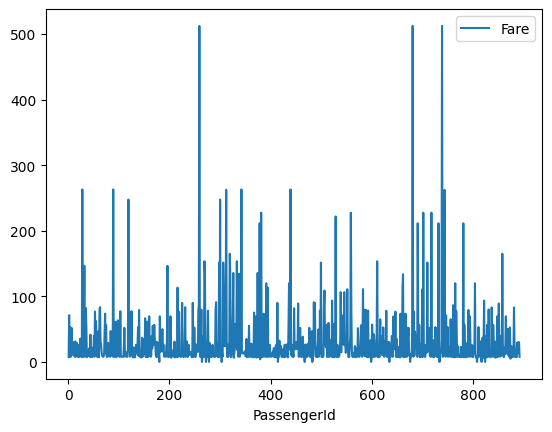

In [83]:
df[['Fare']].plot()
plt.show()

<IPython.core.display.Javascript object>

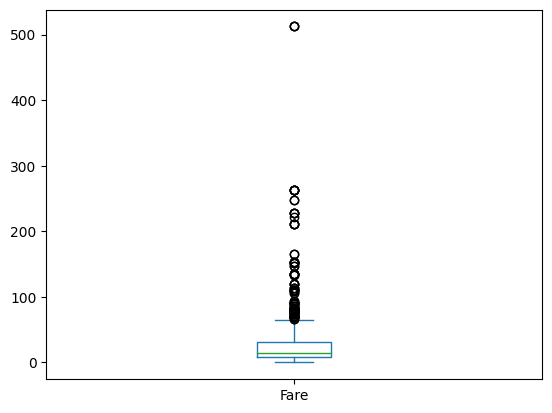

In [84]:
df[['Fare']].plot.box()
plt.show()

<IPython.core.display.Javascript object>

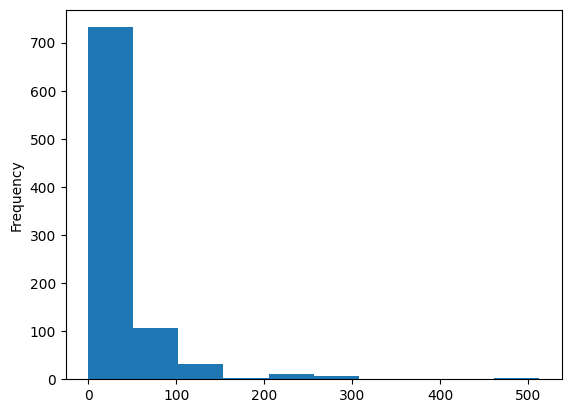

In [85]:
df['Fare'].plot.hist()
plt.show()

#### Summary statistics

In [86]:
df['Age'].mean()

29.69911764705882

In [87]:
df[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [88]:
df[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [89]:
df.agg({
    "Age": ["min", "max", "median", "skew"],
    "Fare": ["min", "max", "median", "mean", "skew"]
})

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,4.787317
mean,NaN,32.204208


#### Group by statistics

In [90]:
df[['Sex', 'Fare']].groupby("Sex").mean()

,Fare
Sex,
female,44.479818
male,25.523893


In [91]:
df.groupby(['Sex', 'Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [92]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Reshape layout of the table

In [93]:
df.sort_values(by="Age").head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


#### Piivot table

In [115]:
above_18 = df[df['Age']> 18]
above_18.pivot(columns='Sex', values='Age').head(9)

Sex,female,male
PassengerId,,
1,NaN,22.0
2,38.0,NaN
3,26.0,NaN
4,35.0,NaN
5,NaN,35.0
7,NaN,54.0
9,27.0,NaN
12,58.0,NaN
13,NaN,20.0


#### Renaming

In [116]:
df = df.rename(columns={"Survived": "Survivors"})
df.head()

,sv,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
